In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import lmdb
import pickle
%matplotlib inline

In [8]:
import caffe

In [9]:


exp = dict(
    source = 'img',
    name = 'raw l:conv4 c:conv5',
    batch_size = 400,
    node = '1',
    transfer = 'conv4',
    lock = 'conv4',
    clean = 'conv5',
    data = dict(a=4)
)

exp_serial = pickle.dumps(exp)
exp2 = pickle.loads(exp_serial)


In [10]:
def create_id(exp):
    tmp = []
    tmp.append(exp.get('source',''))
    tmp.append("t:"+str(exp.get('transfer','')))
    tmp.append("l:"+str(exp.get('lock','')))
    tmp.append("c:"+str(exp.get('clean','')))
    tmp.append("n:"+str(exp.get('node','')))
    tmp.append("bs:"+str(exp.get('batch_size','')))
    return "_".join(tmp)

In [11]:
print create_id(exp)

img_t:conv4_l:conv4_c:conv5_n:1_bs:400


In [12]:
#db_path = "results_lmdb"


#env = lmdb.open(db_path)

#with env.begin(write=True) as txn:
#    txn.replace


In [14]:
import sys
sys.path.append('/home/ffw/workspace/caffe/tools/extra/')

In [15]:

import parse_log

In [43]:
 acc = parse_log.parse_log('/home/ffw/workspace/plantCLEF/experiments/caffe_output.log')
acc[1][0]

OrderedDict([('NumIters', 0.0),
             ('Seconds', 30.531775),
             ('LearningRate', 0.00950351),
             ('accuracy', 0.359286),
             ('accuracy-top5', 0.626667),
             ('loss', 2.98285),
             ('loss1/accuracy', 0.210119),
             ('loss1/accuracy-top5', 0.446548),
             ('loss1/loss', 4.03862),
             ('loss2/accuracy', 0.293572),
             ('loss2/accuracy-top5', 0.555119),
             ('loss2/loss', 3.31284)])

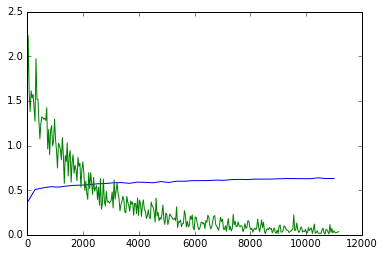

In [46]:
plt.plot(*zip(*[(d['NumIters'], d['accuracy']) for d in acc[1]]))
plt.plot(*zip(*[(d['NumIters'], d['loss']) for d in acc[0]]))


In [81]:
import urllib, json
host = 'http://localhost:5000'
url = host + "/completed_jobs.json"
response = urllib.urlopen(url)
data = json.loads(response.read())

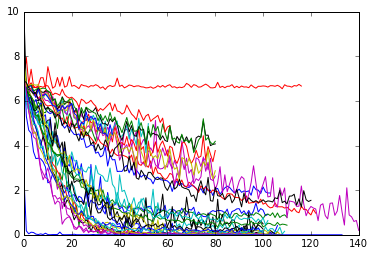

In [67]:
for m in data['models']:
    if 'sparkline' in m:
        plt.plot(m['sparkline'])


In [98]:
id = data['models'][3]['id']
prototxt_url = host  + "/files/" + id + "/train_val.prototxt"
prototxt_str = urllib.urlopen(prototxt_url).read()

prototxt_solver = "solver.prototxt"
net = caffe.proto.caffe_pb2.NetParameter()
caffe.Merge(str(prototxt_str), net)


AttributeError: 'module' object has no attribute 'Merge'

In [71]:
data['models'][3].keys()

[u'epoch (train) min',
 u'accuracy (val) min',
 u'epoch (val) min',
 u'epoch (train) max',
 u'learning_rate (train) max',
 u'loss (train) last',
 u'dataset_id',
 u'loss (val) max',
 u'id',
 u'epoch (val) max',
 u'sparkline',
 u'loss (train) max',
 u'loss (val) last',
 u'loss (val) min',
 u'accuracy (val) max',
 u'learning_rate (train) last',
 u'type',
 u'loss (train) min',
 u'status',
 u'status_css',
 u'accuracy (val) last',
 u'epoch (val) last',
 u'elapsed',
 u'framework',
 u'progress',
 u'epoch (train) last',
 u'name',
 u'submitted',
 u'learning_rate (train) min']

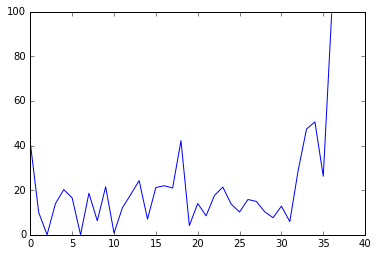

In [77]:
plt.plot([100*m.get('accuracy (val) last',0) for m in data['models']])

In [78]:
http://localhost:5000/files/20160708-003123-0d2e/train_val.prototxt
    

SyntaxError: invalid syntax (<ipython-input-78-6df46d85f292>, line 1)

In [99]:
import protobuf

ImportError: No module named protobuf